## 복습
다이아몬드 데이터 셋은 다이아몬드의 특징으로 가격을 예측하는 데이터 셋입니다. 이를 실습 목적에 맞게 가공하였습니다.
- https://www.kaggle.com/datasets/shivam2503/diamonds

각 컬럼에 대한 설명은 다음과 같습니다.

- price: price in US dollars (\$326--\$18,823)
- carat: weight of the diamond (0.2--5.01)
- cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)
- color: diamond colour, from J (worst) to D (best)
- clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- x: length in mm (0--10.74)
- y: width in mm (0--58.9)
- z: depth in mm (0--31.8)
- table: width of top of diamond relative to widest point (43--95)

In [7]:
import pandas as pd

In [8]:
df = pd.read_csv("./data/diamonds.csv")

In [9]:
df

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,NaN,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,NaN,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56
53938,NaN,Premium,H,SI2,58.0,2757,6.15,6.12,3.74


### 1. 데이터 프레임의 기본 정보를 파악해보세요.
- 행과 열의 개수
- 컬럼 이름과 데이터 타입
- 각 컬럼별 기초 통계량

In [10]:
df.shape

(53940, 9)

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    47323 non-null  float64
 1   cut      53940 non-null  object 
 2   color    30918 non-null  object 
 3   clarity  53940 non-null  object 
 4   table    53934 non-null  float64
 5   price    53940 non-null  int64  
 6   x        53940 non-null  float64
 7   y        53940 non-null  float64
 8   z        53940 non-null  float64
dtypes: float64(5), int64(1), object(3)
memory usage: 3.7+ MB


In [12]:
df.head()

,carat,cut,color,clarity,table,price,x,y,z
0,0.23,Ideal,NaN,SI2,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31
2,0.23,Good,NaN,VS1,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75


In [13]:
df.describe()

,carat,table,price,x,y,z
count,47323.000000,53934.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797428,57.457235,3932.799722,5.731157,5.734526,3.538734
std,0.474489,2.234593,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,95.000000,18823.000000,10.740000,58.900000,31.800000


### 2. 다이아몬드의 깊이를 나타내는 depth라는 파생 변수를 추가해보세요
depth = z / mean(x, y) = 2 * z / (x + y)

In [14]:
df["depth"] = (2 * df["z"]) / (df["x"] + df["y"])

In [15]:
df

,carat,cut,color,clarity,table,price,x,y,z,depth
0,0.23,Ideal,NaN,SI2,55.0,326,3.95,3.98,2.43,0.612863
1,0.21,Premium,E,SI1,61.0,326,3.89,3.84,2.31,0.597671
2,0.23,Good,NaN,VS1,65.0,327,4.05,4.07,2.31,0.568966
3,0.29,Premium,I,VS2,58.0,334,4.20,4.23,2.63,0.623962
4,0.31,Good,J,SI2,58.0,335,4.34,4.35,2.75,0.632911
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,2757,5.75,5.76,3.50,0.608167
53936,0.72,Good,D,SI1,55.0,2757,5.69,5.75,3.61,0.631119
53937,0.70,Very Good,D,SI1,60.0,2757,5.66,5.68,3.56,0.627866
53938,NaN,Premium,H,SI2,58.0,2757,6.15,6.12,3.74,0.609617


### 3. 결측치를 확인하고, 적절한 조치를 취하세요
- 결측치가 너무 많고, 크게 중요하지 않다고 판단되는 컬럼 -> 제거
- 결측치를 적절한 값으로 채워넣기 (자기 아이디어)

In [17]:
df.isnull().sum()

carat       6617
cut            0
color      23022
clarity        0
table          6
price          0
x              0
y              0
z              0
depth          7
dtype: int64

In [18]:
df = df.drop(["color"], axis=1)

In [19]:
df

,carat,cut,clarity,table,price,x,y,z,depth
0,0.23,Ideal,SI2,55.0,326,3.95,3.98,2.43,0.612863
1,0.21,Premium,SI1,61.0,326,3.89,3.84,2.31,0.597671
2,0.23,Good,VS1,65.0,327,4.05,4.07,2.31,0.568966
3,0.29,Premium,VS2,58.0,334,4.20,4.23,2.63,0.623962
4,0.31,Good,SI2,58.0,335,4.34,4.35,2.75,0.632911
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,SI1,57.0,2757,5.75,5.76,3.50,0.608167
53936,0.72,Good,SI1,55.0,2757,5.69,5.75,3.61,0.631119
53937,0.70,Very Good,SI1,60.0,2757,5.66,5.68,3.56,0.627866
53938,NaN,Premium,SI2,58.0,2757,6.15,6.12,3.74,0.609617


In [21]:
df = df.dropna()

In [22]:
df.isnull().sum()

carat      0
cut        0
clarity    0
table      0
price      0
x          0
y          0
z          0
depth      0
dtype: int64

### 4. 카테고리형 컬럼들을 더미 변수화하고, 기존 컬럼은 삭제하세요.

In [24]:
clarity_dummies = pd.get_dummies(df["clarity"], prefix="clarity")

In [26]:
df = pd.concat([df, clarity_dummies], axis=1)

In [27]:
df

,carat,cut,clarity,table,price,x,y,z,depth,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,Ideal,SI2,55.0,326,3.95,3.98,2.43,0.612863,0,0,0,1,0,0,0,0
1,0.21,Premium,SI1,61.0,326,3.89,3.84,2.31,0.597671,0,0,1,0,0,0,0,0
2,0.23,Good,VS1,65.0,327,4.05,4.07,2.31,0.568966,0,0,0,0,1,0,0,0
3,0.29,Premium,VS2,58.0,334,4.20,4.23,2.63,0.623962,0,0,0,0,0,1,0,0
4,0.31,Good,SI2,58.0,335,4.34,4.35,2.75,0.632911,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53934,0.72,Premium,SI1,59.0,2757,5.69,5.73,3.58,0.626970,0,0,1,0,0,0,0,0
53935,0.72,Ideal,SI1,57.0,2757,5.75,5.76,3.50,0.608167,0,0,1,0,0,0,0,0
53936,0.72,Good,SI1,55.0,2757,5.69,5.75,3.61,0.631119,0,0,1,0,0,0,0,0
53937,0.70,Very Good,SI1,60.0,2757,5.66,5.68,3.56,0.627866,0,0,1,0,0,0,0,0


### 5. 연속형 컬럼들은 scaler를 사용하여 적절한 범위로 조정하세요.

In [29]:
from sklearn.preprocessing import StandardScaler

standard_scaler = StandardScaler()
df[["carat"]] = standard_scaler.fit_transform(df[["carat"]])

In [30]:
df

,carat,cut,clarity,table,price,x,y,z,depth,clarity_I1,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,-1.195819,Ideal,SI2,55.0,326,3.95,3.98,2.43,0.612863,0,0,0,1,0,0,0,0
1,-1.237972,Premium,SI1,61.0,326,3.89,3.84,2.31,0.597671,0,0,1,0,0,0,0,0
2,-1.195819,Good,VS1,65.0,327,4.05,4.07,2.31,0.568966,0,0,0,0,1,0,0,0
3,-1.069362,Premium,VS2,58.0,334,4.20,4.23,2.63,0.623962,0,0,0,0,0,1,0,0
4,-1.027209,Good,SI2,58.0,335,4.34,4.35,2.75,0.632911,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53934,-0.163083,Premium,SI1,59.0,2757,5.69,5.73,3.58,0.626970,0,0,1,0,0,0,0,0
53935,-0.163083,Ideal,SI1,57.0,2757,5.75,5.76,3.50,0.608167,0,0,1,0,0,0,0,0
53936,-0.163083,Good,SI1,55.0,2757,5.69,5.75,3.61,0.631119,0,0,1,0,0,0,0,0
53937,-0.205236,Very Good,SI1,60.0,2757,5.66,5.68,3.56,0.627866,0,0,1,0,0,0,0,0


### 6. 컬럼별 피어슨 상관계수를 측정하고 이를 시각화 하세요.

/var/folders/wx/2vw1xwz972zdxff5h8gzrml00000gn/T/ipykernel_10671/3532682417.py:7: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr(),


<Axes: >

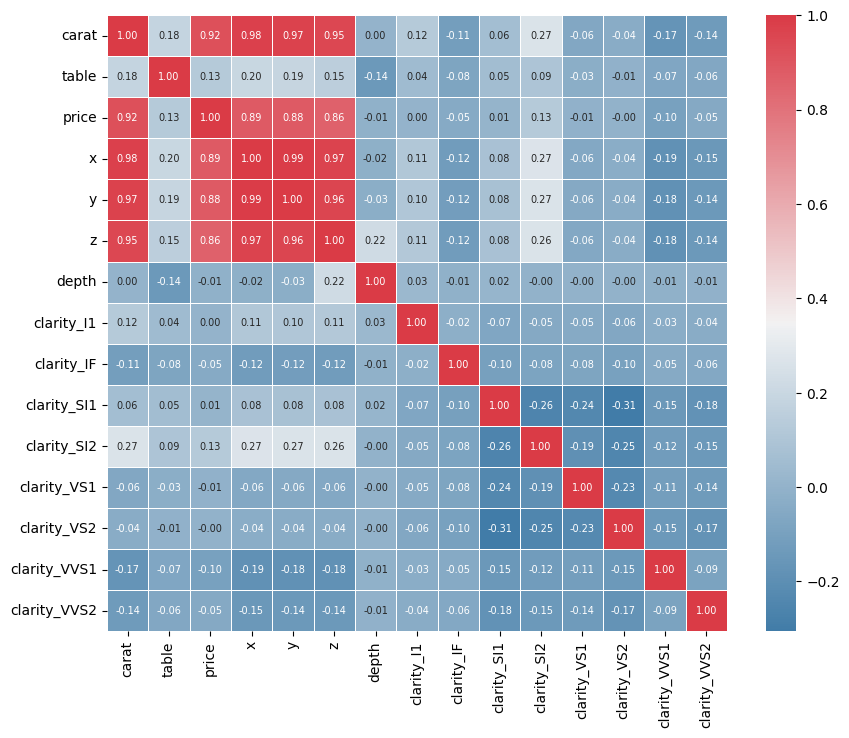

In [32]:
import seaborn as sns
from matplotlib import pyplot as plt

cmap = sns.diverging_palette(240, 10, n=9, as_cmap=True)
plt.figure(figsize=(10, 8))
sns.heatmap(
    df.corr(), 
    annot=True, 
    fmt=".2f", 
    cmap=cmap, 
    linewidths=.5, 
    annot_kws={"size": 7}
)

### 7. 시각화 자료를 참고하여 가격에 영향을 주는 요소로 어떤 것들이 있는지 확인해보세요. 그 외에 데이터를 통해서 얻을 수 있는 인사이트들을 정리해보세요